# 0224

Related links

- [Course website](https://www-math.nsysu.edu.tw/~chlin/2025SMath599/2025SMath599.html)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

Read Chapter 1 when you read this book second time.

In [3]:
import numpy as np

In [4]:
### load nsysu

import os
import urllib
import numpy as np

base = r"https://github.com/SageLabTW/auto-grading/raw/master/nsysu-digits/"
for c in ['X', 'y']:
    filename = "nsysu-digits-%s.csv"%c
    if filename not in os.listdir('.'):
        print(filename, 'not found --- will download')
        urllib.request.urlretrieve(base + c + ".csv", filename)

Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')

In [5]:
# load MNIST (long)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

## [Aggregations: Min, Max, and Everything In Between](https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html)

The universal function apply the same action to each entry.  

In [6]:
arr = np.arange(12).reshape(3,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
arr + 1

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [8]:
np.exp(arr)

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01],
       [5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03],
       [2.98095799e+03, 8.10308393e+03, 2.20264658e+04, 5.98741417e+04]])

In [9]:
# absolute value
np.abs(arr - 6)

array([[6, 5, 4, 3],
       [2, 1, 0, 1],
       [2, 3, 4, 5]])

In [10]:
male = np.array([True, True, False, False])
math_major = np.array([True, False, True, False])
print(male & math_major)
print(male | math_major)

[ True False False False]
[ True  True  True False]


In [11]:
A = np.arange(9).reshape(3,3)
B = np.ones((3,3))
print(A * B) # entrywise product
print(A.dot(B)) # matrix-matrix product

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[ 3.  3.  3.]
 [12. 12. 12.]
 [21. 21. 21.]]


The aggregate function combine several entries (an array, a row, a column) and summarize them by a number.  

In [12]:
arr = np.arange(12).reshape(3,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [13]:
print(arr.sum())
print(arr.min())
print(arr.max())
print(arr.mean())

66
0
11
5.5


In [14]:
arr1 = np.array([True, True, False, False])
arr2 = np.array([False, False, False, False])
print(arr1.any(), arr2.any()) # return True if there is any True inside
print(arr1.all(), arr2.all()) # return True only when all are True

True False
False False


In [15]:
!pip install matplotlib

'pip' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


np.int64(51)

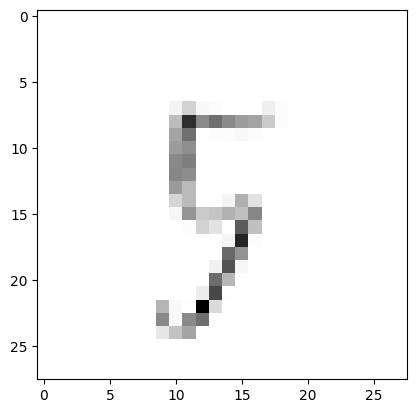

In [16]:
# check NSYSU-digits data
# pip install matplotlib
import matplotlib.pyplot as plt
img0 = Xsys[0].reshape(28,28)
plt.imshow(img0, cmap="Greys")
np.sum(img0 > 10) # sum of 28 x 28 boolean array: count the number of True's

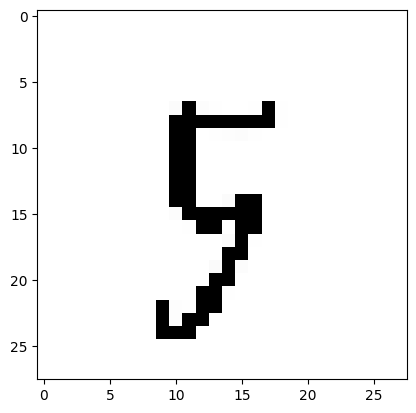

In [18]:
img1 = img0.copy()
img1[img1>10] = 255
plt.imshow(img1,cmap="Greys")

In [21]:
mask = (img1 > 10)
x_mask = np.any(mask,axis=0)
print(x_mask)
x_ind = np.arange(28)[x_mask]
print(x_ind.min(),x_ind.max())

[False False False False False False False False False  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False]
9 17


In [27]:
ax1 , ax2 = np.where(img1 > 10)
print(ax1.min(),ax1.max())
print(ax2.min(),ax2.max())

7 24
9 17


In [17]:
arr = np.arange(12).reshape(3,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [18]:
# axis=0 columns, axis=1 rows
print(arr.sum(axis=0))
print(arr.sum(axis=1))

[12 15 18 21]
[ 6 22 38]


Q: How to center the data?

In [19]:
arr = np.arange(12).reshape(6,2)
arr

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [20]:
center = arr.mean(axis=0)
# not recommended
print(arr - np.ones((6,1)).dot(center[np.newaxis,:]))
# recommended by broadcasting
print(arr - center) # (6,2) - (2,)

[[-5. -5.]
 [-3. -3.]
 [-1. -1.]
 [ 1.  1.]
 [ 3.  3.]
 [ 5.  5.]]
[[-5. -5.]
 [-3. -3.]
 [-1. -1.]
 [ 1.  1.]
 [ 3.  3.]
 [ 5.  5.]]


Q: From adjacency matrix to degree matrix.  
(Ignore this question for now.)

If `arr.shape == (3,2,4)` , 
then `arr.sum()` is a number,  
`arr.sum(axis=0) == (2,4)`,  
`arr.sum(axis=1) == (3,4)`,  
`arr.sum(axis=2) == (3,2)`.

In [21]:
arr = np.ones((3,2,4))
print(arr.sum(axis=0))
print(arr.sum(axis=1))
print(arr.sum(axis=2))

[[3. 3. 3. 3.]
 [3. 3. 3. 3.]]
[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
[[4. 4.]
 [4. 4.]
 [4. 4.]]


Let $\{a_{i,j,k}\}$ be an array.  
Then `a.sum(axis=1)` is another array $\{a_{i,?,k}\}$, where 

$$
    a_{i,?,k} = \sum_{j} a_{i,j,k}.
$$

In [22]:
from PIL import Image
img = Image.open("photo.jpg")
arr = np.array(img)
plt.imshow(arr.mean(axis=2), cmap="Greys_r") # (160,160)

FileNotFoundError: [Errno 2] No such file or directory: 'photo.jpg'

In [ ]:
Xsys_img = Xsys.reshape(1890,28,28)
print(Xsys_img.shape)
mask = (ysys == 5)
print(Xsys_img[mask].shape)
plt.imshow(Xsys_img[mask].mean(axis=0), cmap="Greys") # (28,28)

In [ ]:
X = mnist.data.values
y = mnist.target.values.astype(int)
X_img = X.reshape(70000,28,28)
print(X_img.shape)
mask = (y == 5)
print(X_img[mask].shape)
plt.imshow(X_img[mask].mean(axis=0), cmap="Greys") # (28,28)

## [Computation on Arrays: Broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

arr + scalar

In [ ]:
arr = np.arange(12).reshape(3,4)
arr + 1

column + row (or 1-dim)

In [ ]:
A = np.ones((6,1))
B = np.array([5,6])
print(A, A.shape)
print(B, B.shape)
A * B

column * row = matrix
$$
    \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} \times
    \begin{bmatrix} 5 & 6 \end{bmatrix} =
    \begin{bmatrix}
        1 \times 5 & 1 \times 6 \\
        1 \times 5 & 1 \times 6 \\
        1 \times 5 & 1 \times 6 \\
        1 \times 5 & 1 \times 6 \\
        1 \times 5 & 1 \times 6 \\
        1 \times 5 & 1 \times 6 \\
    \end{bmatrix}
$$

Review how we centered the data.

See picture.
![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

Q: Vandermonde matrix (polynomial feature)

$$
    \begin{bmatrix}
    1 & 3 & 3^2 \\
    1 & 5 & 5^2 \\
    1 & 7 & 7^2
    \end{bmatrix}
$$

In [ ]:
xs = np.array([3,5,7]).reshape(3,1)
powers = np.array([0,1,2])
xs ** powers

### Rules of broad casting
- **Rule 1**: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- **Rule 2**: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- **Rule 3**: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

dimension ~ axis

distance matrix
```
    X # array (N,3) x1, ... , xN in R3
```
Using `for` loop, the naive method requires `N x N` iterations.  

In [ ]:
N = 1000
X = np.random.randn(N, 3)
X

In [ ]:
%%timeit
dist_mtx = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        xi = X[i]
        xj = X[j]
        dist_mtx[i,j] = np.sqrt(np.sum((xi - xj)**2))
dist_mtx[:5,:5]

In [ ]:
%%timeit
X_col = X.reshape(N,1,3)
X_row = X.reshape(1,N,3)
# common shape should be (N, N, 3)
dist_mtx = np.sqrt(np.sum((X_col - X_row) ** 2, axis=2)) # (N, N, 3)
dist_mtx[:5,:5]

## [Comparisons, Masks, and Boolean Logic](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html)

to be continued next time

mask

mask selection and modification

increase contrast of a photo

In [ ]:
hist

In [ ]:
plt.hist(Xsys[0], bins=50)

Q: Find the bounding box.

In [ ]:
mean of same digits

data processing  
https://www.openml.org/search?type=data&status=active&id=554

## Homework

- Type your answers here and submit your answer in `*.ipynb` format.
- You may use code cell and Markdown cell.

In [ ]:
NAME = "Your name" # change to your name
STD_ID = "Your student id" # change to your student ID
print("My name is %s and my student ID is %s."%(NAME, STD_ID))

### Exercise 1: Basic Aggregations
Create a NumPy array of integers from 1 to 20. Compute and print the following:
- The sum of all elements
- The minimum value
- The maximum value
- The mean value

In [ ]:
arr = np.arange(1,21)

print(arr.sum())
print(arr.min())
print(arr.max())
print(arr.mean())

210
1
20
10.5


### Exercise 2: Row-wise and Column-wise Aggregations
Generate a 4x5 matrix of random integers between 10 and 99. Compute and print:
- The sum of each row
- The sum of each column
- The maximum value in each row
- The minimum value in each column

In [ ]:
arr = np.random.randint(10,100,(4,5))
print(arr)
print(arr.sum(axis=1).reshape(4,1))
print(arr.sum(axis=0))
print(arr.max(axis=1).reshape(4,1))
print(arr.min(axis=0))


[[46 95 54 31 40]
 [66 75 51 87 88]
 [80 13 93 52 94]
 [79 72 50 53 97]]
[[266]
 [367]
 [332]
 [351]]
[271 255 248 223 319]
[[95]
 [88]
 [94]
 [97]]
[46 13 50 31 40]


### Exercise 3: Cumulative and Reduced Aggregations
Given the array `[1, 2, 3, 4, 5]`, compute and print:
- The cumulative sum
- The cumulative product
- The product of all elements using `np.prod`

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.cumsum())
print(arr.cumprod())
print(arr.prod())

[ 1  3  6 10 15]
[  1   2   6  24 120]
120


### Exercise 4: Basic Broadcasting
Create a 3x3 matrix and add a 1D array of size 3 to it. Observe and explain the result.

In [ ]:
arr = np.arange(0,9).reshape(3,3)
print(arr)
arr2 = np.arange(0,3)
print(arr2)
print(arr+arr2)
#Each row of 3*3 array add 1D array once

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]]


### Exercise 5: Broadcasting with Different Shapes
Given a 4x1 matrix and a 1x4 matrix, add them together and print the result. Explain how broadcasting is applied in this case.

In [ ]:
arr1 = np.arange(0,4).reshape(4,1)
arr2 = np.arange(0,4).reshape(1,4)
print(arr1+arr2)
#arr1(4*1) and arr2(1*4) are broadcasted into common size 4*4, then add together

[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]


### Exercise 6: Element-wise Operations with Broadcasting
Generate a 5x5 matrix with values from 1 to 25. Subtract the mean of each row from the respective row using broadcasting. Print the resulting matrix.

In [ ]:
arr = np.arange(1,26).reshape(5,5)
#print(arr)
arr2 = arr - arr.mean(axis=1).reshape(5,1)
print(arr2)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]


### Exercise 7: Boolean Masking
Create an array of 15 random integers between 1 and 50. Extract and print all elements greater than 25.

In [ ]:
arr = np.random.randint(1,51,15)
print(arr[arr>25])

[43 37 50 35 30 47 26 27 34 28]


### Exercise 8: Counting and Boolean Operations
Generate a 1D array of 20 random integers between 1 and 100. Compute and print:
- The number of elements greater than 50
- The number of elements less than or equal to 30
- The proportion of elements that are even numbers

In [23]:
arr = np.random.randint(1,101,20)
print(arr[arr>50])
print(arr[arr<=30])
#print(arr[arr%2==0])
print(arr[arr>50].size)
print(arr[arr<=30].size)
print((arr[arr%2==0].size)/arr.size)

[60 52 53 97 76 82 83 62 70 98 99 97]
[12 28 30 18 23  9]
12
6
0.55


### Exercise 9: Conditional Modifications
Create an array of 10 random integers between 1 and 20. Replace all even numbers with -1 using Boolean indexing.

In [77]:
arr = np.random.randint(1,21,10)
#print(arr)
arr[arr%2==0]=-1
print(arr)


[-1 -1 17 -1 15 15 -1 -1 -1 17]


### Exercise 10: Combining Conditions
Create a 5x5 matrix of random integers between 1 and 100. Print all elements that are:
- Greater than 50 and even
- Less than 30 or odd

In [82]:
arr = np.random.randint(1,101,(5,5))
print(arr)
print(arr[(arr>50) & (arr%2==0)])
print(arr[(arr<30) | (arr%2==1)])

[[78 21 43 50 16]
 [22 25 18 72 67]
 [69 59 94 31 96]
 [56 91 82 14 79]
 [99 66 66 86 74]]
[78 72 94 96 56 82 66 66 86 74]
[21 43 16 22 25 18 67 69 59 31 91 14 79 99]
